In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/Clusterizacao-dados-sem-rotulo/main/Dados/dados_mkt.csv'

# Coletando e ajustando dados

In [3]:
df= pd.read_csv(url)
df.head()

,sexo,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,...,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas
0,F,27,49,0,0,10,0,0,10,0,...,0,0,0,0,0,0,0,0,0,10
1,F,27,41,0,0,0,0,0,0,0,...,10,20,40,0,10,0,0,0,0,10
2,F,26,1,0,0,0,0,0,10,0,...,10,0,50,0,0,0,30,0,0,0
3,M,28,32,0,50,0,0,0,0,0,...,10,10,0,0,0,0,0,0,0,0
4,M,28,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sexo               12992 non-null  object
 1   idade              12992 non-null  int64 
 2   numero_de_amigos   12992 non-null  int64 
 3   basquete           12992 non-null  int64 
 4   futebol_americano  12992 non-null  int64 
 5   futebol            12992 non-null  int64 
 6   softbol            12992 non-null  int64 
 7   voleibol           12992 non-null  int64 
 8   natacao            12992 non-null  int64 
 9   animacao           12992 non-null  int64 
 10  beisebol           12992 non-null  int64 
 11  tenis              12992 non-null  int64 
 12  esportes           12992 non-null  int64 
 13  fofo               12992 non-null  int64 
 14  danca              12992 non-null  int64 
 15  banda              12992 non-null  int64 
 16  marcha             12992 non-null  int64

In [5]:
df['sexo'].unique()

array(['F', 'M', 'NE'], dtype=object)

## Aplicando encoder

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories=[['F', 'M', 'NE']],sparse_output=False)

In [7]:
encoded_sexo = encoder.fit_transform(df[['sexo']])
encoded_sexo

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [8]:
encoded_df = pd.DataFrame(encoded_sexo,columns=encoder.get_feature_names_out(['sexo']))
encoded_df.head()

,sexo_F,sexo_M,sexo_NE
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [9]:
dados = pd.concat([encoded_df,df],axis=1).drop('sexo',axis=1)
dados

,sexo_F,sexo_M,sexo_NE,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,...,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas
0,1.0,0.0,0.0,27,49,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,10
1,1.0,0.0,0.0,27,41,0,0,0,0,0,...,10,20,40,0,10,0,0,0,0,10
2,1.0,0.0,0.0,26,1,0,0,0,0,0,...,10,0,50,0,0,0,30,0,0,0
3,0.0,1.0,0.0,28,32,0,50,0,0,0,...,10,10,0,0,0,0,0,0,0,0
4,0.0,1.0,0.0,28,18,0,0,0,0,0,...,0,0,0,0,0,0,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,1.0,0.0,0.0,26,21,0,0,0,0,0,...,0,10,10,0,0,0,20,0,0,0
12988,1.0,0.0,0.0,26,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12989,1.0,0.0,0.0,27,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12990,1.0,0.0,0.0,27,20,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,0


In [10]:
import joblib

joblib.dump(encoder,'encoder.pkl')

['encoder.pkl']

## Desenvolvendo o modelo

In [11]:
from sklearn.cluster import KMeans

mod_kmeans = KMeans(n_clusters=2,random_state=45)

In [12]:
modelo = mod_kmeans.fit(dados)

c:\Devs\Repositorios\Minhas_Praticas\Alura\data_science\Clusterizacao_lidando_com_dados_sem_rotulo\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Devs\Repositorios\Minhas_Praticas\Alura\data_science\Clusterizacao_lidando_com_dados_sem_rotulo\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Devs\Repositorios\Minhas_Praticas\Alura\data_science\Clusterizacao_lidando_com_dados_sem_rotulo\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_

# Avaliando o K-means

In [13]:
mod_kmeans.inertia_

24912957.594588563

In [14]:
from sklearn.metrics import silhouette_score

labels = mod_kmeans.predict(dados)
silhouette = silhouette_score(dados, labels)
print(f'Silhouette Score: {silhouette:.3f}')

Silhouette Score: 0.380


## Avaliando métricas para diferentes K

In [15]:
def avaliacao(dados):
    inercia = []
    silhueta = []
    
    for i in range(2,21):
        kmeans = KMeans(n_clusters=i, n_init='auto',random_state=45)
        kmeans.fit(dados)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'k={i} - {str(silhouette_score(dados,kmeans.predict(dados)))}')
        
    return inercia,silhueta

In [16]:
inercia, silhueta = avaliacao(dados)

In [17]:
inercia

[24912957.594588563,
 21861102.609498847,
 20611918.833604738,
 19790413.438039836,
 18972018.650555894,
 17737549.61576759,
 17445083.86158896,
 16683649.718693912,
 16069096.090546774,
 15629929.57590071,
 15339413.098621843,
 15090959.275861524,
 14806363.370104816,
 14597982.517535755,
 14444937.941286283,
 14253230.534250135,
 14011173.582026722,
 13767980.305824803,
 13509141.068260856]

In [18]:
silhueta

['k=2 - 0.3799715886302017',
 'k=3 - 0.2631947012216279',
 'k=4 - 0.27497370057197046',
 'k=5 - 0.2762790287828939',
 'k=6 - 0.2814107923103627',
 'k=7 - 0.19566339131554092',
 'k=8 - 0.12271514125212872',
 'k=9 - 0.1281093701405103',
 'k=10 - 0.13020718009107704',
 'k=11 - 0.13209306347804026',
 'k=12 - 0.09015815350273831',
 'k=13 - 0.09002551845716941',
 'k=14 - 0.08959066111262458',
 'k=15 - 0.09427696863257996',
 'k=16 - 0.09552364235312874',
 'k=17 - 0.09543714624178481',
 'k=18 - 0.08844412672288283',
 'k=19 - 0.08449109715052519',
 'k=20 - 0.08484109789709748']

## Aula 2.3 - Verificando a silhueta por amostras

In [19]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silhueta (n_clusters, dados):

  # Aplica o KMeans ao conjunto de dados
  kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
  cluster_previsoes = kmeans.fit_predict(dados)

  # Calcula o silhouette score médio
  silhueta_media = silhouette_score(dados, cluster_previsoes)
  print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')

  # Calcula a pontuação de silhueta para cada amostra
  silhueta_amostra = silhouette_samples(dados, cluster_previsoes)

  # Configuração da figura para o gráfico de silhueta
  fig, ax1 = plt.subplots(1, 1)
  fig.set_size_inches(9, 7)

  # Limites do gráfico de silhueta
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(dados) + (n_clusters + 1) * 10])

  y_lower = 10
  for i in range(n_clusters):
      ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
      ith_cluster_silhueta_amostra.sort()

      tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
      y_upper = y_lower + tamanho_cluster_i

      cor = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra,
                        facecolor=cor, edgecolor=cor, alpha=0.7)

      ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
      y_lower = y_upper + 10  # 10 para o espaço entre gráficos

  # Linha vertical para a média do Silhouette Score
  ax1.axvline(x=silhueta_media, color='red', linestyle='--')

  ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
  ax1.set_xlabel('Valores do coeficiente de silhueta')
  ax1.set_ylabel('Rótulo do cluster')

  ax1.set_yticks([])  # Remove os ticks do eixo y
  ax1.set_xticks([i/10.0 for i in range(-1, 11)])

  plt.show()

Valor médio para 2 clusters: 0.380


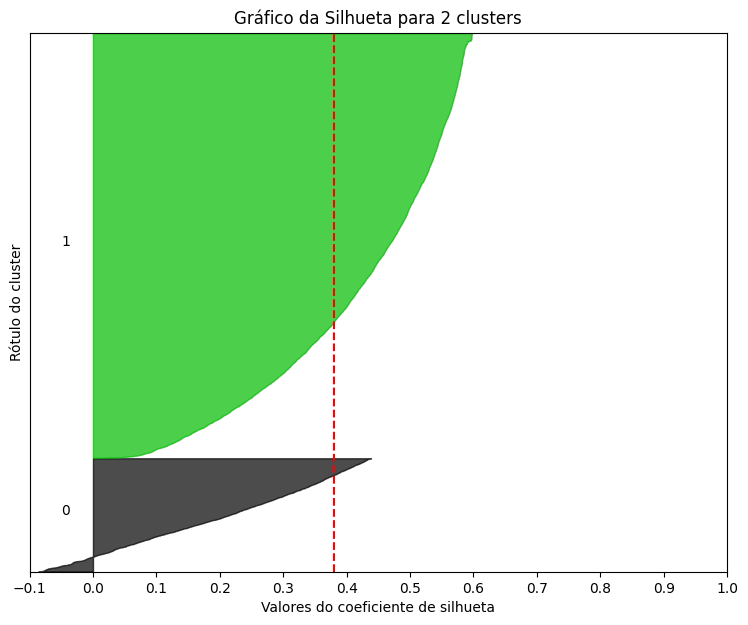

In [20]:
graf_silhueta(2,dados=dados)

### Outras visualizações

In [21]:
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,21),inercia,'bo-')

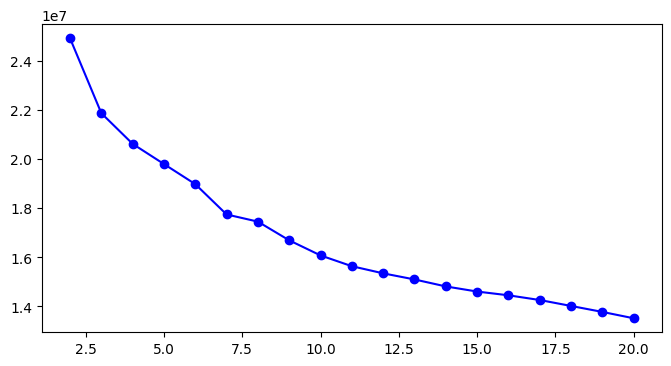

In [22]:
plot_cotovelo(inercia= inercia)

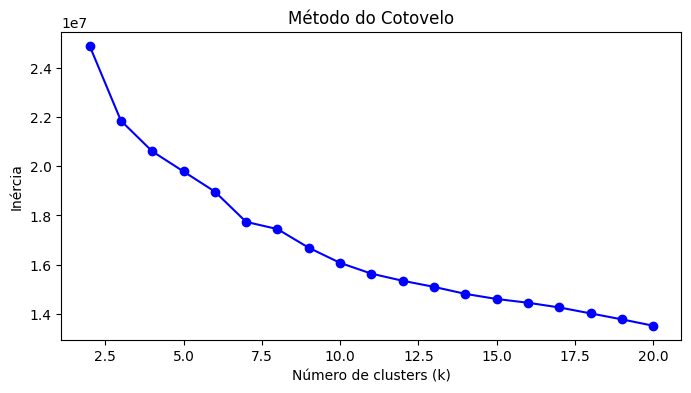

In [23]:
#Inercia - Método Cotuvelo

inercias = []

for k in range(2,21):
    kmeans = KMeans(n_clusters=k,n_init='auto',random_state=45)
    kmeans.fit(dados)
    inercias.append(kmeans.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(range(2,21),inercias,'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [24]:
dados.describe()

,sexo_F,sexo_M,sexo_NE,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,...,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas
count,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,...,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000
mean,0.761469,0.166256,0.072275,26.852679,31.283790,3.063424,2.927186,2.536946,1.836515,1.641010,...,8.377463,2.794027,4.932266,1.340055,2.977986,4.094828,1.720289,0.819735,0.589594,1.050647
std,0.426202,0.372325,0.258953,1.203746,35.891178,8.374443,7.431099,9.810703,7.881526,6.818708,...,12.428216,7.838415,11.523673,4.934874,7.479126,7.670547,5.092112,3.799795,2.999547,4.492218
min,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,26.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,27.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,28.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.000000,10.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,30.000000,605.000000,220.000000,90.000000,220.000000,170.000000,140.000000,...,230.000000,180.000000,210.000000,70.000000,120.000000,110.000000,80.000000,80.000000,80.000000,80.000000


# Avaliação e ajuste de dados

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dados_escalados = scaler.fit_transform(dados)
dados_escalados

array([[1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.125],
       [1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.125],
       [1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [26]:
dados_escalados = pd.DataFrame(dados_escalados,columns=dados.columns) 

In [27]:
dados_escalados.describe()

,sexo_F,sexo_M,sexo_NE,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,...,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas
count,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,...,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000
mean,0.761469,0.166256,0.072275,0.650298,0.051709,0.013925,0.032524,0.011532,0.010803,0.011721,...,0.036424,0.015522,0.023487,0.019144,0.024817,0.037226,0.021504,0.010247,0.007370,0.013133
std,0.426202,0.372325,0.258953,0.133750,0.059324,0.038066,0.082568,0.044594,0.046362,0.048705,...,0.054036,0.043547,0.054875,0.070498,0.062326,0.069732,0.063651,0.047497,0.037494,0.056153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.555556,0.008264,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.666667,0.034711,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.777778,0.074380,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.043478,0.000000,0.047619,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

## Verificando as métricas para os novos dados

In [30]:
inercias, silhhuetas = avaliacao(dados=dados_escalados)

In [31]:
silhhuetas

['k=2 - 0.6684575483061149',
 'k=3 - 0.7447500875317523',
 'k=4 - 0.3053068053389572',
 'k=5 - 0.30744468106291056',
 'k=6 - 0.31123870300235945',
 'k=7 - 0.308586085961114',
 'k=8 - 0.319777962428705',
 'k=9 - 0.22706218374995285',
 'k=10 - 0.22472400849594745',
 'k=11 - 0.2279857438367391',
 'k=12 - 0.22555027549761023',
 'k=13 - 0.161857953330379',
 'k=14 - 0.1629865017307581',
 'k=15 - 0.16552254369386532',
 'k=16 - 0.16673895280847606',
 'k=17 - 0.16384282247396914',
 'k=18 - 0.16521943288325708',
 'k=19 - 0.16528102868681546',
 'k=20 - 0.150010750442223']

Valor médio para 3 clusters: 0.745


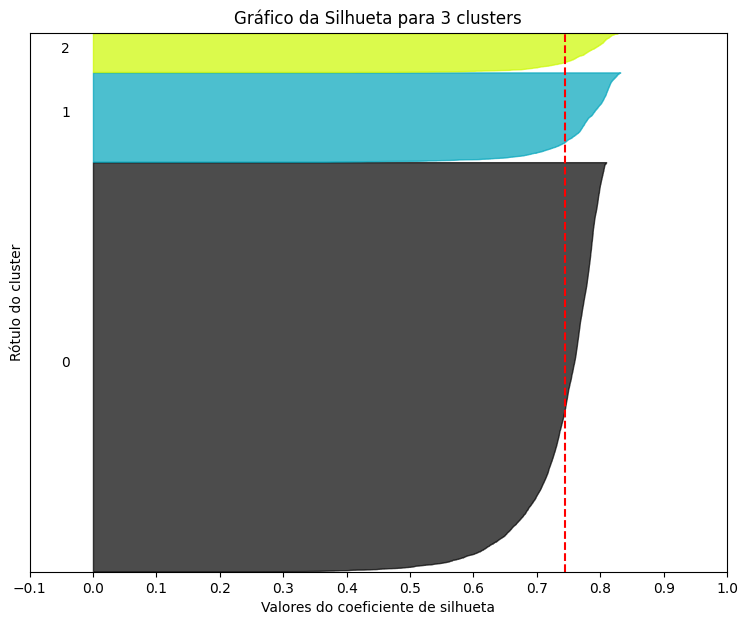

In [32]:
graf_silhueta(3,dados=dados_escalados)

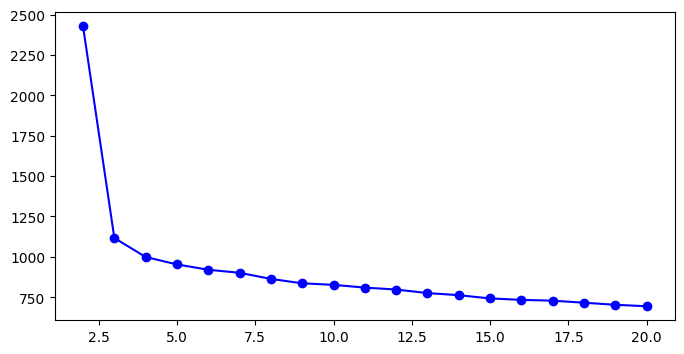

In [33]:
plot_cotovelo(inercia=inercias)

## Criando o melhor modelo

In [34]:
modelo_kmeans = KMeans(n_clusters=3,random_state=45,n_init='auto')
modelo_kmeans.fit(dados_escalados)

KMeans(n_clusters=3, n_init='auto', random_state=45)

In [35]:
joblib.dump(modelo_kmeans,'kmeans.pkl')

['kmeans.pkl']

# Analisando as informações de cada cluster

## Descrevendo cada agrupamento